## Data plotting notebook comparing of vertical atmospheric sounding

Takes data measured by TF-ATMON on FIK-9 flight and compares that with radiosonde sounding in a similar time from Libus observatory. 



In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
df = pd.read_csv('Praha_Libus_2023-12-02-1200.txt', sep='\\s+', skiprows=1)
print(df.columns)


Index(['PRES', 'HGHT', 'TEMP', 'DWPT', 'RELH', 'MIXR', 'DRCT', 'SPED', 'THTA',
       'THTE', 'THTV'],
      dtype='object')


In [3]:
tables = []

field = 'sensor_hygrometer'
pr = field+'/'
d = pd.DataFrame(pd.read_csv('log100_sensor_hygrometer_1.csv')).set_index('timestamp').sort_index()
d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
tables.append(d)


field = 'sensor_barometer'
pr = field+'/'
d = pd.DataFrame(pd.read_csv('log100_sensor_baro_0.csv')).set_index('timestamp').sort_index()
d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
tables.append(d)


field = 'vehicle_local_position'
pr = field+'/'
d = pd.DataFrame(pd.read_csv('log100_vehicle_local_position_0.csv')).set_index('timestamp').sort_index()
d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
tables.append(d)

field = 'vehicle_global_position'
pr = field+'/'
d = pd.DataFrame(pd.read_csv('log100_vehicle_global_position_0.csv')).set_index('timestamp').sort_index()
d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
tables.append(d)

field = 'vehicle_gps_position'
pr = field+'/'
d = pd.DataFrame(pd.read_csv('log100_vehicle_gps_position_0.csv')).set_index('timestamp').sort_index()
d = d.add_prefix(pr).rename(columns={pr+'timestamp':'timestamp'})
tables.append(d)


meas = pd.concat(tables, sort=True).sort_index().interpolate(method="linear")


for ds in [meas]:
    ds['vehicle_local_position/z'] *= -1
    ds['wind_spd'] = ds['vehicle_gps_position/vel_m_s']


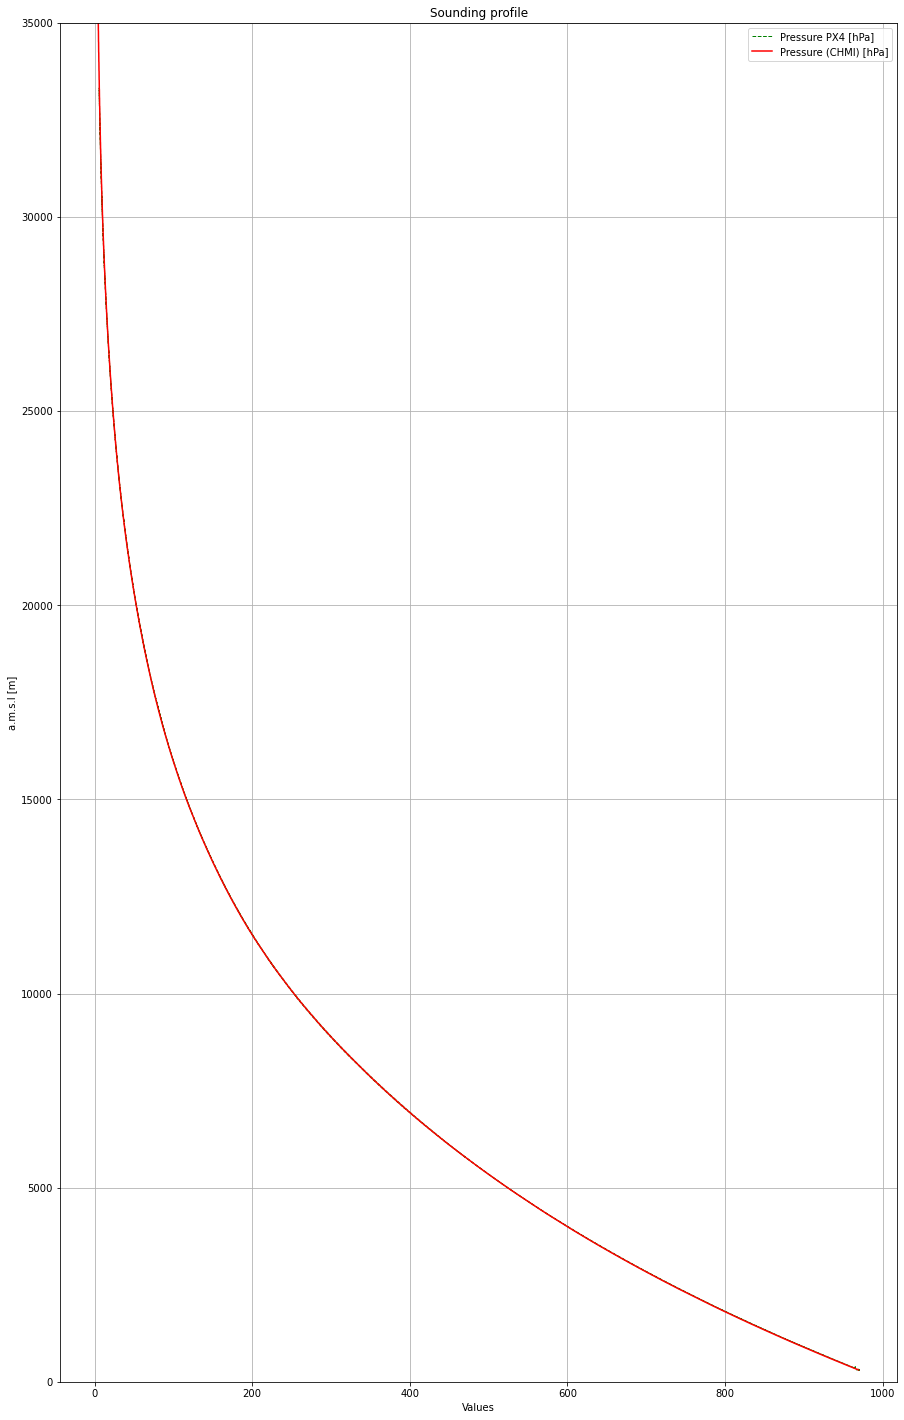

In [16]:
plt.figure(figsize=(15, 25))

plt.plot(meas['sensor_barometer/pressure']/100, meas['vehicle_gps_position/altitude_msl_m'], color="green", ls='--', lw=1, label="Pressure PX4 [hPa]")
plt.plot(df['PRES'], df['HGHT'], label='Pressure (CHMI) [hPa]', color='red')



plt.ylabel("a.m.s.l [m]")
plt.xlabel("Values")
#plt.xlim(0,15)
plt.ylim(0, 35000)
plt.title("Sounding profile")
plt.grid()
plt.legend()

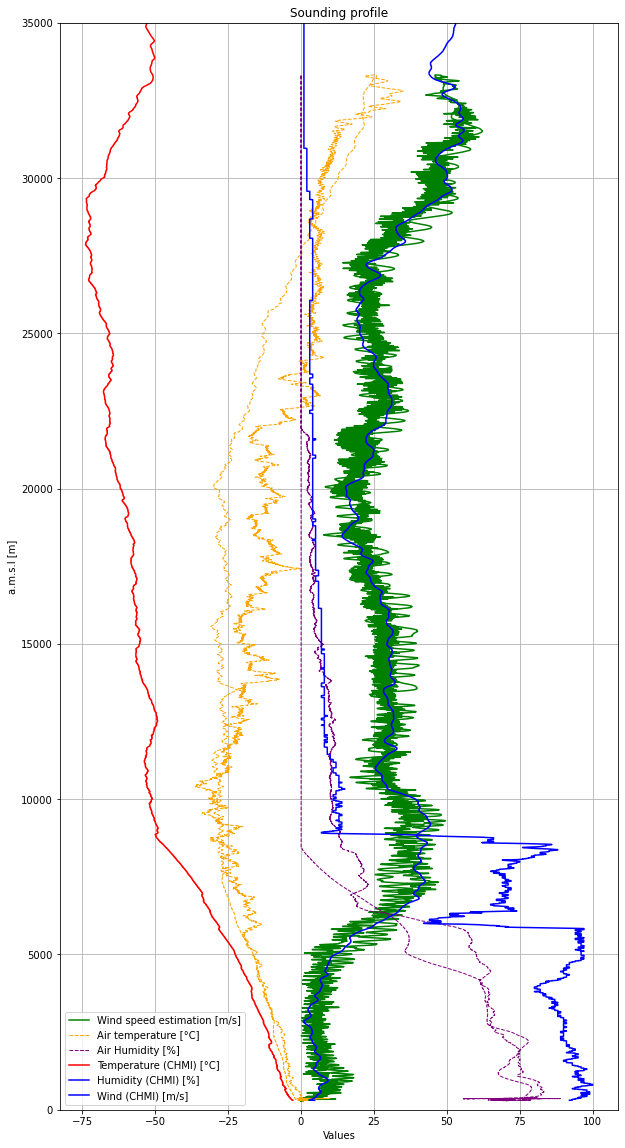

In [19]:
plt.figure(figsize=(10, 20))

plt.plot(meas['wind_spd'], meas['vehicle_gps_position/altitude_msl_m'], color="green", ls='-', label="Wind speed estimation [m/s]")
plt.plot(meas['sensor_hygrometer/temperature'], meas['vehicle_gps_position/altitude_msl_m'], color="orange", ls='--', lw=1, label="Air temperature [°C]")
plt.plot(meas['sensor_hygrometer/humidity'], meas['vehicle_gps_position/altitude_msl_m'], color="purple", ls='--', lw=1, label="Air Humidity [%]")
plt.plot(df['TEMP'], df['HGHT'], label='Temperature (CHMI) [°C]', color='red')
plt.plot(df['RELH'], df['HGHT'], label='Humidity (CHMI) [%]', color='blue')
plt.plot(df['SPED'], df['HGHT'], label='Wind (CHMI) [m/s]', color='blue')


plt.ylabel("a.m.s.l [m]")
plt.xlabel("Values")
#plt.xlim(0,15)
plt.ylim(0, 35000)
plt.title("Sounding profile")
plt.grid()
plt.legend()

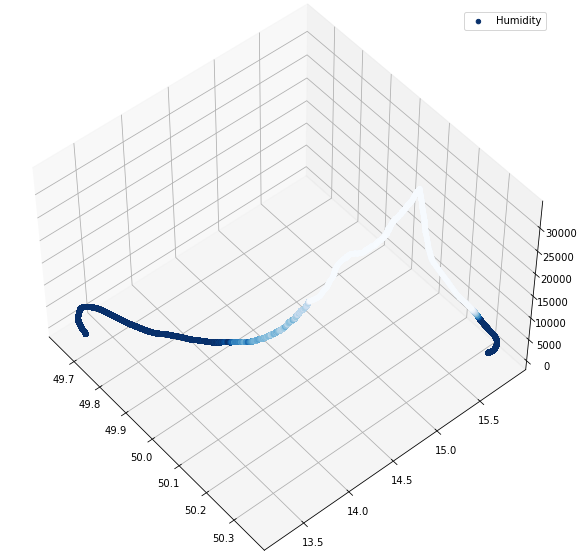

In [6]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(meas['vehicle_global_position/lat'], meas['vehicle_global_position/lon'], meas['vehicle_gps_position/altitude_msl_m'], c=meas['sensor_hygrometer/humidity'], cmap='Blues', vmin=0, vmax=10, label="Humidity")
ax.view_init(50, -40)
plt.legend()
plt.grid()

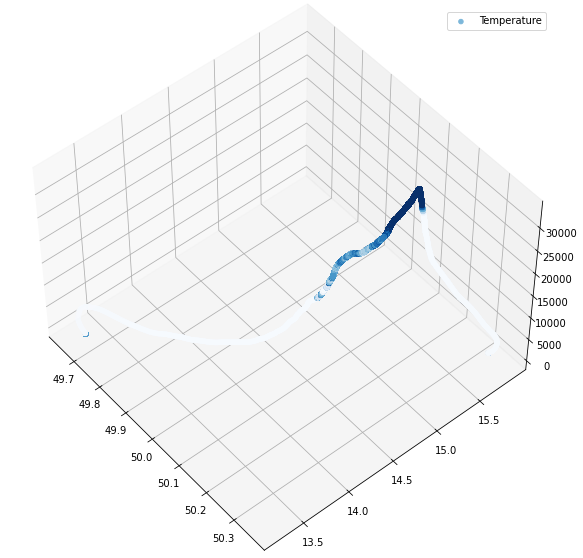

In [7]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(meas['vehicle_global_position/lat'], meas['vehicle_global_position/lon'], meas['vehicle_gps_position/altitude_msl_m'], c=meas['sensor_hygrometer/temperature'], cmap='Blues', vmin=0, vmax=10, label="Temperature")
ax.view_init(50, -40)
plt.legend()
plt.grid()

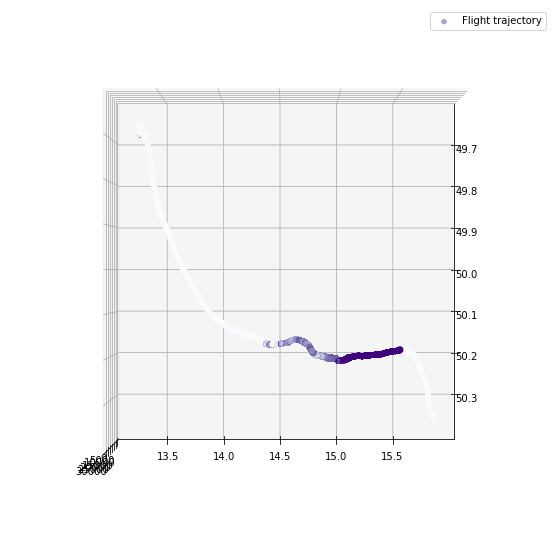

In [8]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(meas['vehicle_global_position/lat'], meas['vehicle_global_position/lon'], meas['vehicle_local_position/z'], c=meas['sensor_hygrometer/temperature'], cmap='Purples', vmin=0, vmax=10, label="Flight trajectory")
ax.view_init(90, 0)
plt.legend()
plt.grid()